In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import pearsonr

df = pd.read_csv("C:\\Users\\Shree\\Downloads\\archive\\student_depression_dataset.csv")  
print(df.head())  


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

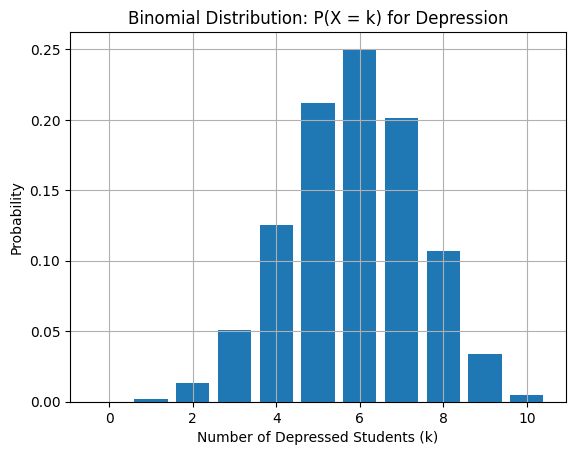

P(X = 0) = 0.0001
P(X = 1) = 0.0021
P(X = 2) = 0.0134
P(X = 3) = 0.0506
P(X = 4) = 0.1252
P(X = 5) = 0.2122
P(X = 6) = 0.2497
P(X = 7) = 0.2016
P(X = 8) = 0.1068
P(X = 9) = 0.0335
P(X = 10) = 0.0047


In [61]:
# Probability of depression
p = df['Depression'].mean()
n = 10  # sample size

# Binomial probability mass function
x = range(0, n+1)
probs = binom.pmf(x, n, p)

# Plotting
plt.bar(x, probs)
plt.title('Binomial Distribution: P(X = k) for Depression')
plt.xlabel('Number of Depressed Students (k)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Show calculated probabilities
for i, prob in zip(x, probs):
    print(f"P(X = {i}) = {prob:.4f}")


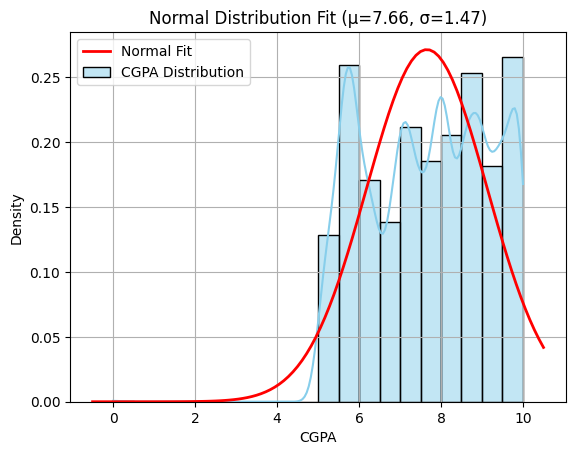

In [63]:
# Drop NA values for CGPA
cgpa_data = df['CGPA'].dropna()

# Plot histogram with normal curve
sns.histplot(cgpa_data, kde=True, stat="density", bins=20, color='skyblue', label="CGPA Distribution")

# Fit a normal distribution
mu, std = norm.fit(cgpa_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Fit')

plt.title(f'Normal Distribution Fit (μ={mu:.2f}, σ={std:.2f})')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Population vs Sample + Sample Mean
# Full data as population
population = df['CGPA'].dropna()

# Draw random sample of size 30
sample = population.sample(30, random_state=42)

# Calculate means
population_mean = population.mean()
sample_mean = sample.mean()

print(f"Population Mean (CGPA): {population_mean:.2f}")
print(f"Sample Mean (CGPA, n=30): {sample_mean:.2f}")


Population Mean (CGPA): 7.66
Sample Mean (CGPA, n=30): 7.58


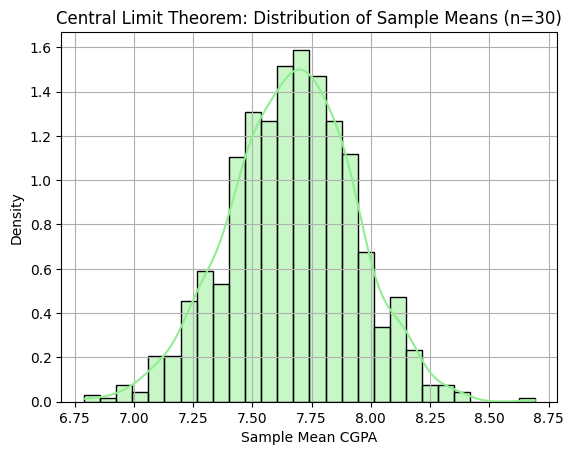

In [67]:
# Central Limit Theorem (CLT)
sample_means = []

# Take 1000 samples of size 30
for _ in range(1000):
    sample = population.sample(30, replace=True)
    sample_means.append(sample.mean())

# Plotting the distribution of sample means
sns.histplot(sample_means, kde=True, stat="density", color='lightgreen')
plt.title('Central Limit Theorem: Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean CGPA')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [69]:
 # Null and Alternate Hypothesis + P-value
# Remove NaN values
cgpa_data = df['CGPA'].dropna()

# Perform one-sample t-test against population mean = 7.0
t_stat, p_val = ttest_1samp(cgpa_data, popmean=7.0)

print("H₀: Mean CGPA = 7.0")
print("H₁: Mean CGPA ≠ 7.0")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Check significance at alpha = 0.05
if p_val < 0.05:
    print("Result: Reject the Null Hypothesis (Significant Difference)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No Significant Difference)")


H₀: Mean CGPA = 7.0
H₁: Mean CGPA ≠ 7.0
t-statistic: 74.5172
p-value: 0.0000
Result: Reject the Null Hypothesis (Significant Difference)


In [71]:
# Independent t-test (Gender-based CGPA difference)
# Load your dataset (only needed if running independently)
# df = pd.read_csv("student_depression_dataset.csv")

# Separate CGPA values by gender
male_cgpa = df[df['Gender'] == 'Male']['CGPA'].dropna()
female_cgpa = df[df['Gender'] == 'Female']['CGPA'].dropna()

# Perform two-sample t-test (independent samples)
t_stat, p_val = ttest_ind(male_cgpa, female_cgpa, equal_var=False)

print("H₀: Male and Female CGPAs are equal")
print("H₁: Male and Female CGPAs are different")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4e}")

# Conclusion based on significance level
alpha = 0.05
if p_val < alpha:
    print("Result: Reject the Null Hypothesis (Significant Difference)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No Significant Difference)")


H₀: Male and Female CGPAs are equal
H₁: Male and Female CGPAs are different
t-statistic: 6.0091
p-value: 1.8906e-09
Result: Reject the Null Hypothesis (Significant Difference)


In [73]:
# Coefficient of Correlation
# Drop NA values
data = df[['Work/Study Hours', 'CGPA']].dropna()

# Calculate Pearson correlation coefficient
correlation = data['Work/Study Hours'].corr(data['CGPA'])

print(f"Coefficient of Correlation between Work/Study Hours and CGPA: {correlation:.4f}")

if correlation > 0:
    print("Interpretation: Positive correlation – more hours may lead to higher CGPA.")
elif correlation < 0:
    print("Interpretation: Negative correlation – more hours may lead to lower CGPA.")
else:
    print("Interpretation: No correlation.")


Coefficient of Correlation between Work/Study Hours and CGPA: 0.0026
Interpretation: Positive correlation – more hours may lead to higher CGPA.


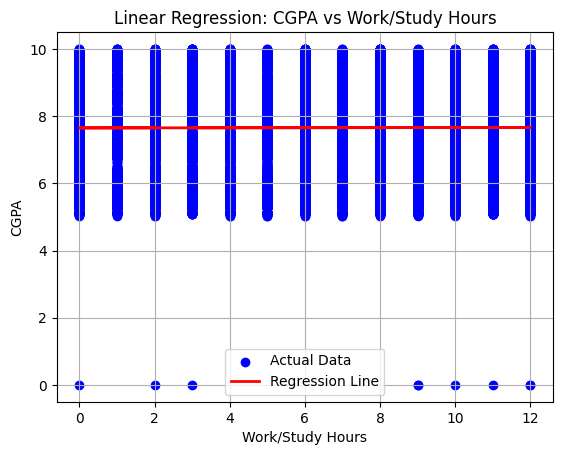

Regression Line: CGPA = 7.65 + 0.00 × Work/Study Hours


In [75]:
# Linear Regression + Line of Regression
# Prepare data
X = data[['Work/Study Hours']]  # independent variable
y = data['CGPA']                # dependent variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: CGPA vs Work/Study Hours')
plt.xlabel('Work/Study Hours')
plt.ylabel('CGPA')
plt.legend()
plt.grid(True)
plt.show()

# Regression equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression Line: CGPA = {intercept:.2f} + {slope:.2f} × Work/Study Hours")
